In [1]:
import tensorflow as tf
import tensorflow.keras as kr
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
datasetpaths = [os.path.join(r"dataset", i) for i in os.listdir(r"dataset")]
print(datasetpaths)

['dataset\\Beagle', 'dataset\\Boxer', 'dataset\\Bulldog', 'dataset\\Dachshund', 'dataset\\German_Shepherd', 'dataset\\Golden_Retriever', 'dataset\\Labrador_Retriever', 'dataset\\Poodle', 'dataset\\Rottweiler', 'dataset\\Yorkshire_Terrier']


In [3]:
breeds = ["Golden Retriever",
"German Shepherd",
"Labrador Retriever",
"Bulldog",
"Beagle",
"Poodle",
"Rottweiler",
"Yorkshire Terrier",
"Boxer",
"Dachshund"]
len(breeds)


10

In [4]:
shapey = 10
breedsonehot = {"Golden Retriever":0,
"German Shepherd":1,
"Labrador Retriever":2,
"Bulldog":3,
"Beagle":4,
"Poodle":5,
"Rottweiler":6,
"Yorkshire Terrier":7,
"Boxer":8,
"Dachshund":9}

#kr.utils.to_categorical

In [5]:
x = []

datasetlabel = datasetpaths[0]
datasetlabel

'dataset\\Beagle'

(107, 162, 3)


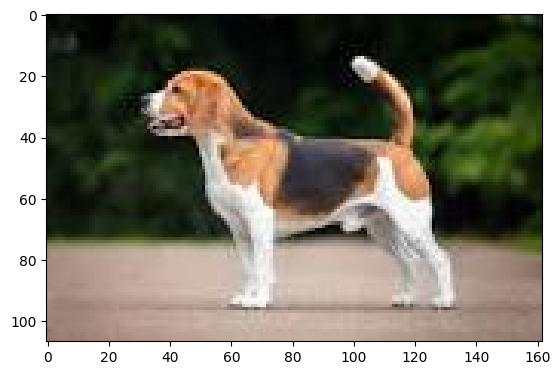

In [6]:
x = plt.imread(os.path.join(datasetlabel, os.listdir(datasetlabel)[0]))
print(x.shape)
plt.imshow(x)

(140, 148, 3)


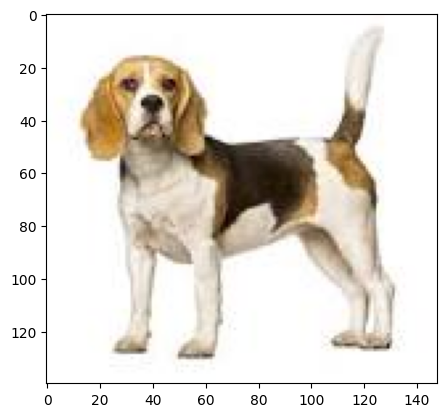

In [7]:
x = plt.imread(os.path.join(datasetlabel, os.listdir(datasetlabel)[1]))
print(x.shape)
plt.imshow(x)

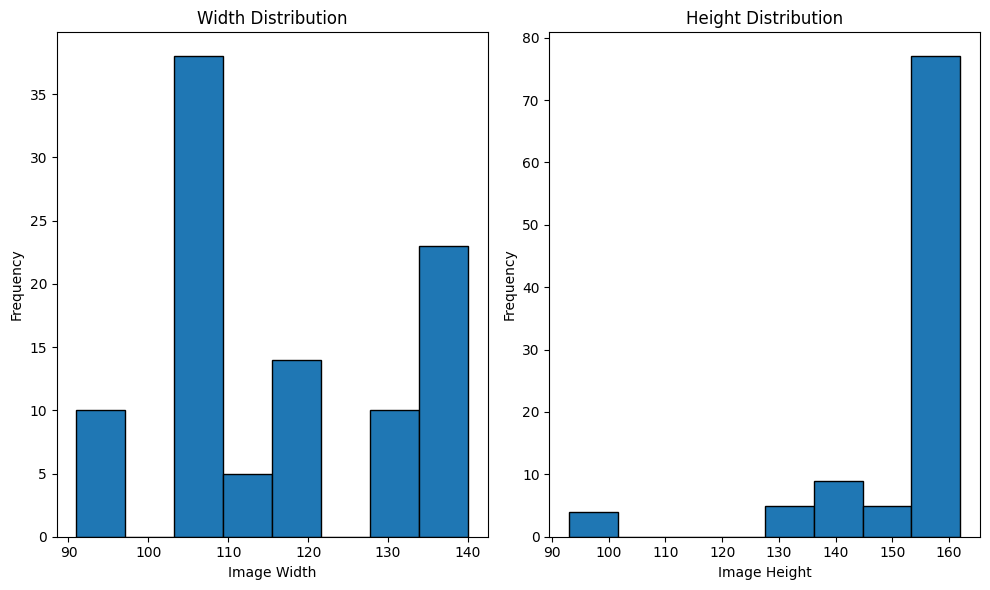

width max:  140
width min:  91
height max:  162
height min:  93


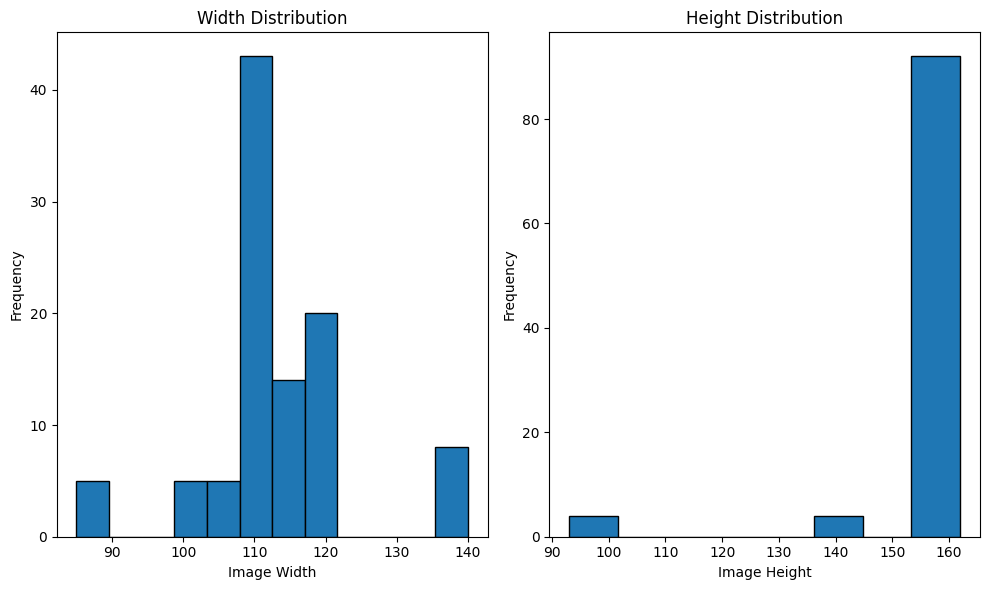

width max:  140
width min:  85
height max:  162
height min:  93


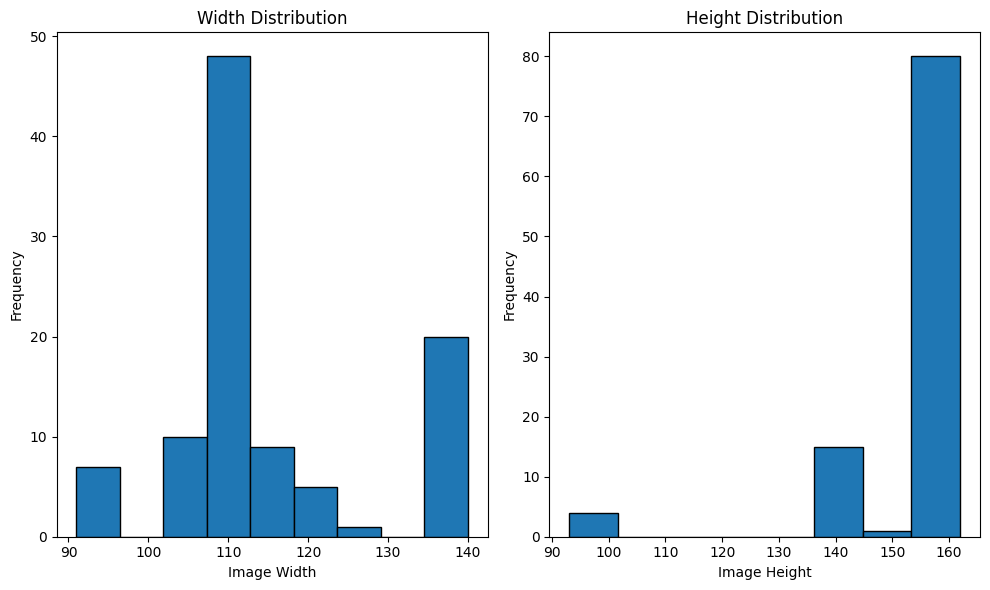

width max:  140
width min:  91
height max:  162
height min:  93


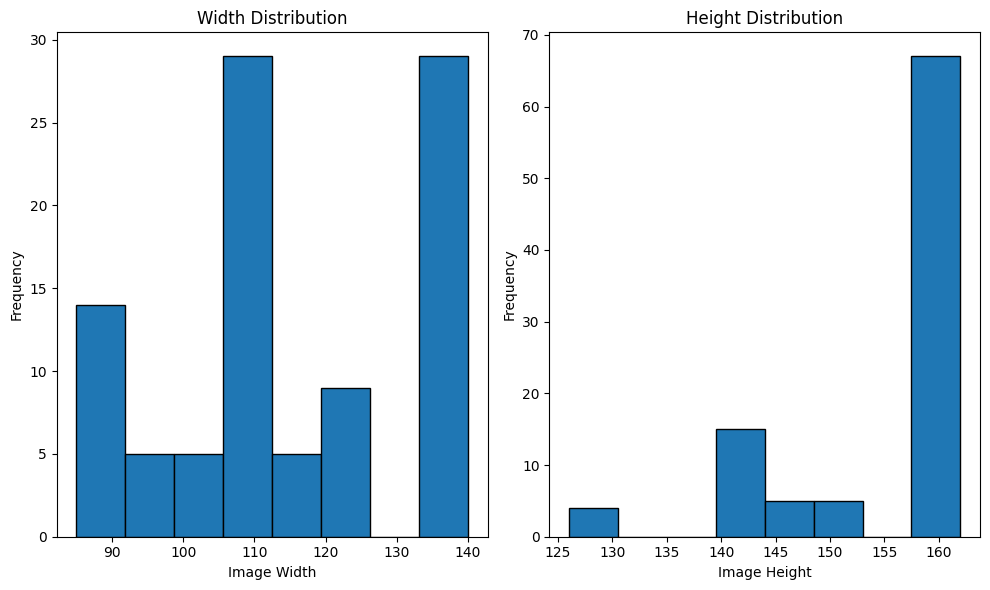

width max:  140
width min:  85
height max:  162
height min:  126


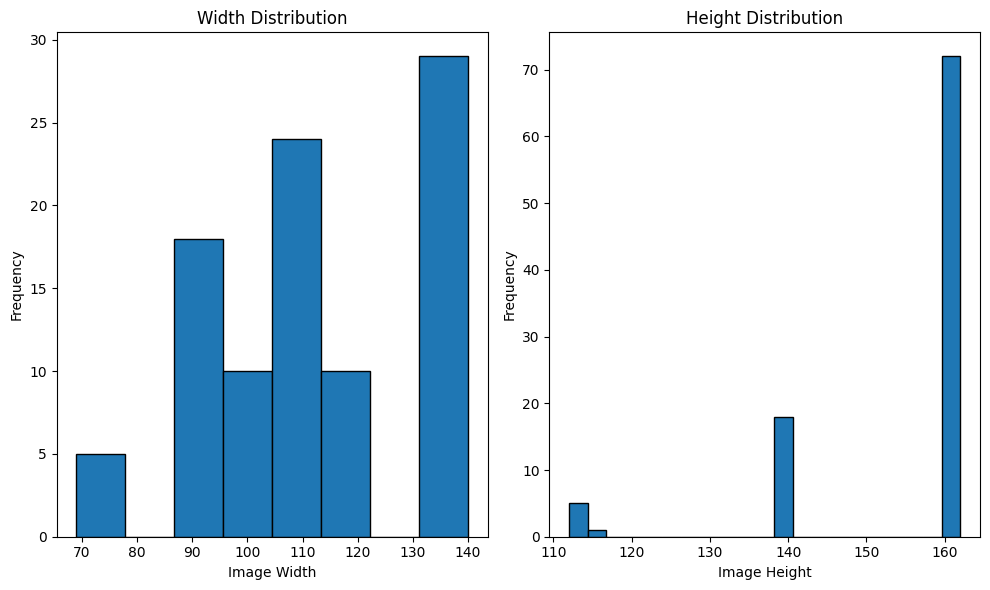

width max:  140
width min:  69
height max:  162
height min:  112


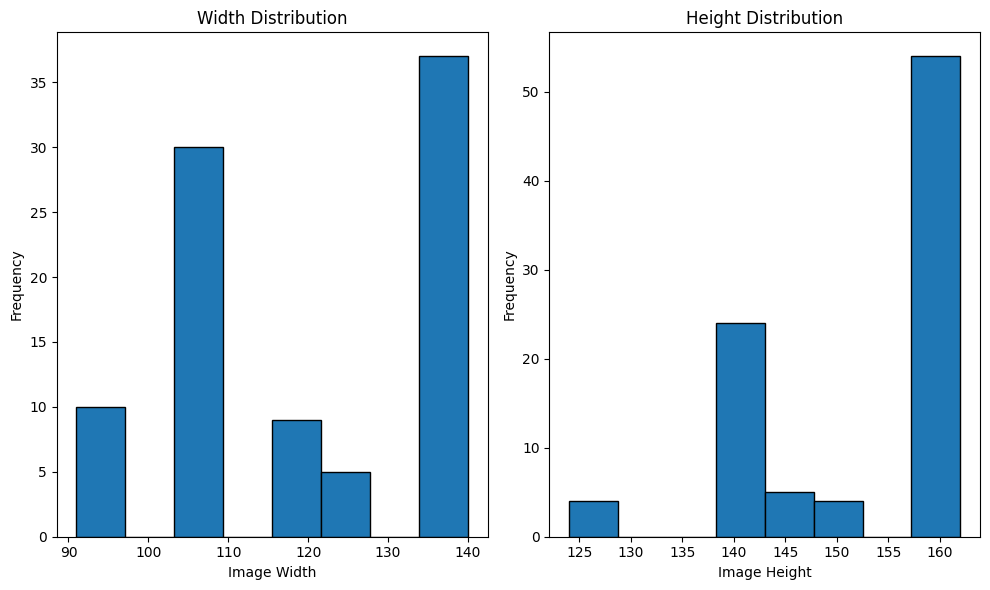

width max:  140
width min:  91
height max:  162
height min:  124


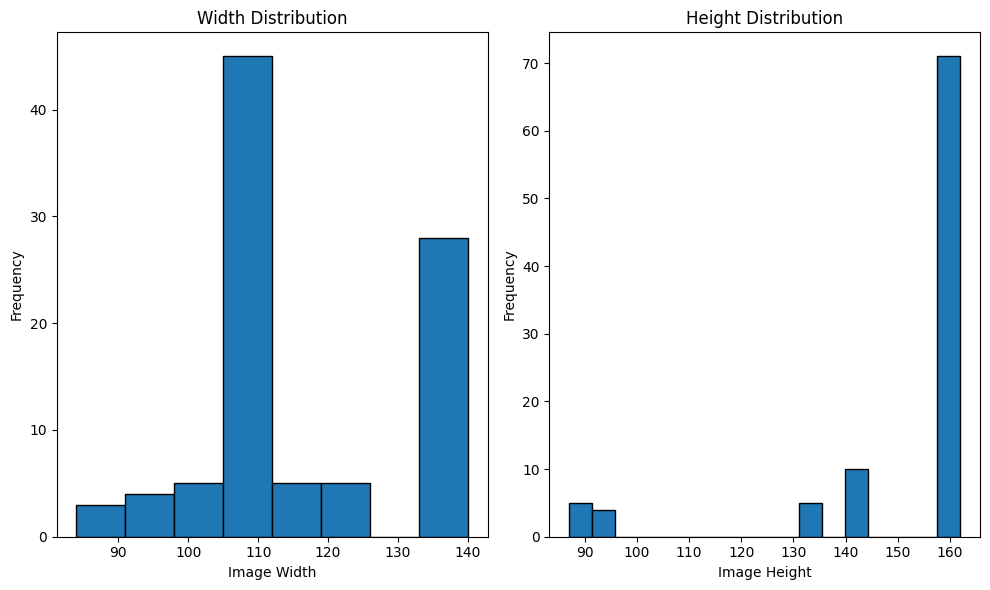

width max:  140
width min:  84
height max:  162
height min:  87


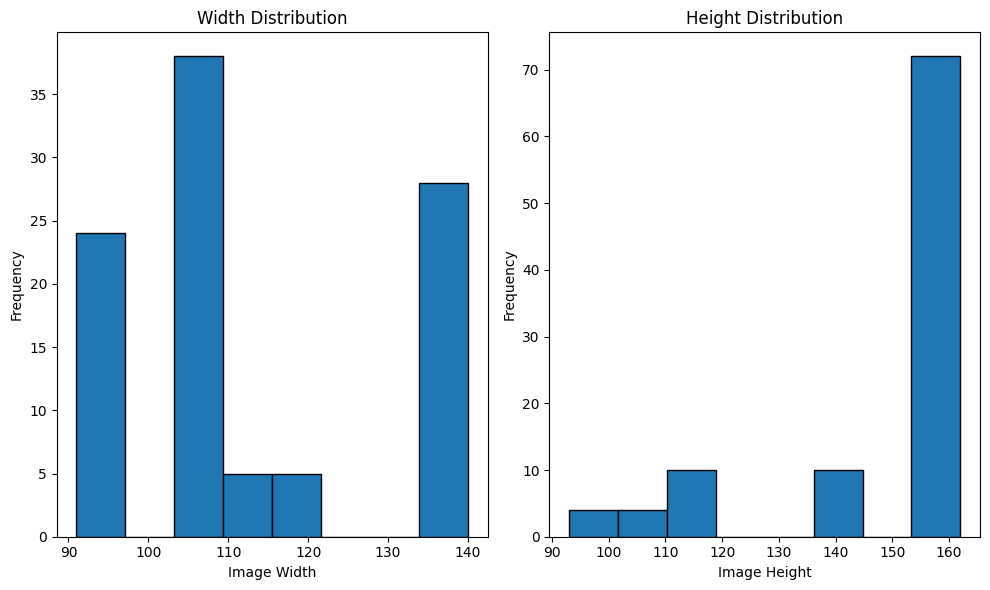

width max:  140
width min:  91
height max:  162
height min:  93


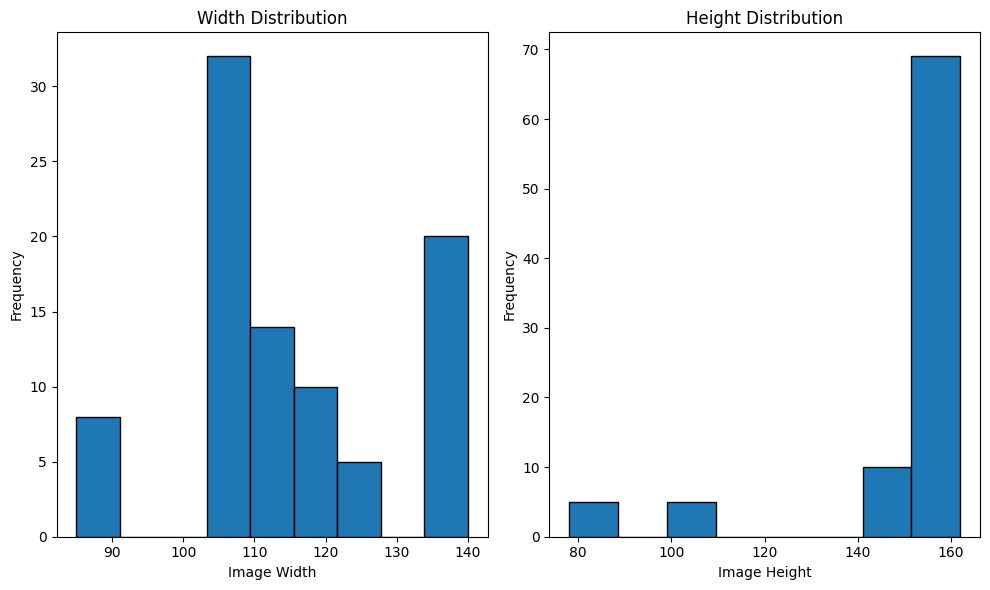

width max:  140
width min:  85
height max:  162
height min:  78


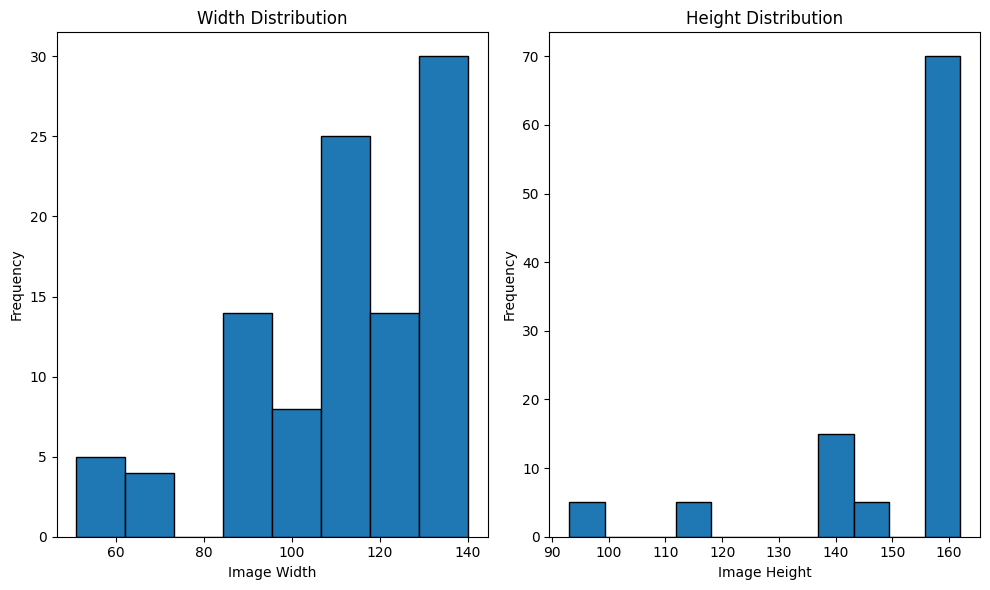

width max:  140
width min:  51
height max:  162
height min:  93


In [8]:
allheight = []
allwidth = []
def get_image_size(image_path):
    """
    This function takes an image path and returns its width and height as a tuple.
    """
    x = plt.imread(image_path).shape
    width, height = x[0],x[1]
    return width, height

for datasetlabel in datasetpaths:
    widths = []
    heights = []
    for filename in os.listdir(datasetlabel):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_shape = plt.imread(os.path.join(datasetlabel, filename)).shape
            widths.append(image_shape[0])
            heights.append(image_shape[1])
    plt.figure(figsize=(10, 6))

    # Histogram for width
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins='auto', edgecolor='black')
    plt.xlabel("Image Width")
    plt.ylabel("Frequency")
    plt.title("Width Distribution")

    # Histogram for height
    plt.subplot(1, 2, 2)
    plt.hist(heights, bins='auto', edgecolor='black')
    plt.xlabel("Image Height")
    plt.ylabel("Frequency")
    plt.title("Height Distribution")

    plt.tight_layout()
    plt.show()
    print("width max: ",max(widths))
    print("width min: ",min(widths))
    
    print("height max: ",max(heights))
    print("height min: ",min(heights))
    allheight.append(heights)
    allwidth.append(widths)

In [9]:
print("all width max: ",max(max(allwidth)))
print("all width min: ",min(min(allwidth)))

print("all height max: ",max(max(allheight)))
print("all height min: ",min(min(allheight)))

all width max:  140
all width min:  91
all height max:  162
all height min:  93


(140, 162, 3)


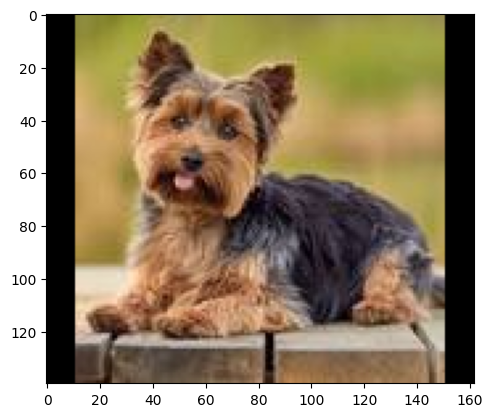

In [10]:


x = plt.imread(os.path.join(datasetlabel, os.listdir(datasetlabel)[0]))
#os.path.join(datasetlabel,x)
x = tf.image.resize_with_crop_or_pad(x,140,162)
plt.imshow(x)
print(x.shape)
#since all diff shape best shape would be 140,162



def imgfrompath(x):
    image = plt.imread(x)
    image_resize = tf.image.resize_with_crop_or_pad(image,140,162)
    return image_resize


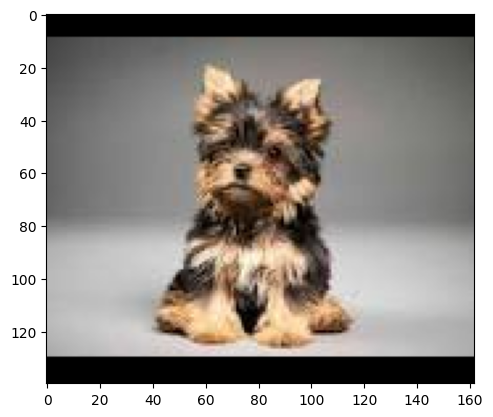

In [11]:
plt.imshow(imgfrompath(os.path.join(datasetlabel, os.listdir(datasetlabel)[1])))


In [12]:
Beagle = [os.path.join(datasetpaths[0],i) for i in os.listdir(datasetpaths[0])]

Boxer = [os.path.join(datasetpaths[1],i) for i in os.listdir(datasetpaths[1])]

Bulldog = [os.path.join(datasetpaths[2],i) for i in os.listdir(datasetpaths[2])]

Dachshund = [os.path.join(datasetpaths[3],i) for i in os.listdir(datasetpaths[3])]

German_Shepherd = [os.path.join(datasetpaths[4],i) for i in os.listdir(datasetpaths[4])]

Golden_Retriever = [os.path.join(datasetpaths[5],i) for i in os.listdir(datasetpaths[5])]

Labrador_Retriever = [os.path.join(datasetpaths[6],i) for i in os.listdir(datasetpaths[6])]

Poodle = [os.path.join(datasetpaths[7],i) for i in os.listdir(datasetpaths[7])]

Rottweiler = [os.path.join(datasetpaths[8],i) for i in os.listdir(datasetpaths[8])]

Yorkshire_Terrier = [os.path.join(datasetpaths[9],i) for i in os.listdir(datasetpaths[9])]

breedvar = [Beagle,Boxer,Bulldog,Dachshund,German_Shepherd,Golden_Retriever,Labrador_Retriever,Poodle,Rottweiler,Yorkshire_Terrier]


In [13]:
kr.utils.to_categorical(9,shapey)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [14]:
kr.utils.to_categorical?

Signature: kr.utils.to_categorical(x, num_classes=None)
Docstring:
Converts a class vector (integers) to binary class matrix.

E.g. for use with `categorical_crossentropy`.

Args:
    x: Array-like with class values to be converted into a matrix
        (integers from 0 to `num_classes - 1`).
    num_classes: Total number of classes. If `None`, this would be inferred
        as `max(x) + 1`. Defaults to `None`.

Returns:
    A binary matrix representation of the input as a NumPy array. The class
    axis is placed last.

Example:

>>> a = keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
>>> print(a)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

>>> b = np.array([.9, .04, .03, .03,
...               .3, .45, .15, .13,
...               .04, .01, .94, .05,
...               .12, .21, .5, .17],
...               shape=[4, 4])
>>> loss = keras.ops.categorical_crossentropy(a, b)
>>> print(np.around(loss, 5))
[0.10536 0.82807 0.1011  1.77196]

>>> loss = keras.ops.cate

In [15]:
# np.argmax(p) for converting onehot to original indices

In [16]:
def preprocess(paths):
    x = np.expand_dims(imgfrompath(paths[0]),axis=0)

    
    #labels


    labelname = paths[0].split("\\")[-1].split("_")[0]
    y = np.expand_dims(kr.utils.to_categorical(breedsonehot[labelname],shapey),0)
    
    
    for i in range(1,len(paths)):

        #x
        temp = np.expand_dims(imgfrompath(paths[i]),axis=0)
        x = np.concatenate((x,temp),axis=0)
        
        labelname = paths[i].split("\\")[-1].split("_")[0]
        #y
        tempy = np.expand_dims(kr.utils.to_categorical(breedsonehot[labelname],shapey),0)
        y = np.concatenate((y,tempy),0)
    return x , y


x,y =preprocess(Beagle)
print(x.shape)
print(y.shape)

(100, 140, 162, 3)
(100, 10)


In [17]:
x_full = preprocess(breedvar[0])[0]
y_full = preprocess(breedvar[0])[1]
for i in range(1,len(breedvar)):
    x,y = preprocess(breedvar[i])
    x_full = np.concatenate((x_full,x),axis=0)
    y_full = np.concatenate((y_full,y),axis=0)
print(x_full.shape)
print(y_full.shape)

(967, 140, 162, 3)
(967, 10)


4


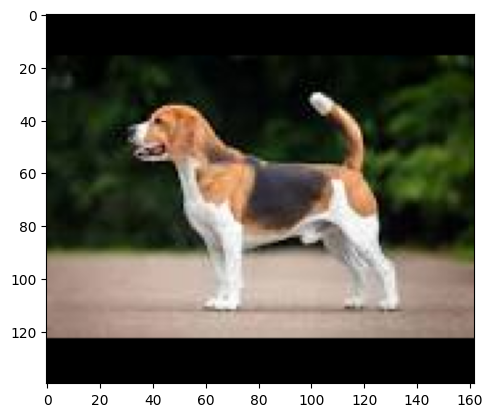

In [18]:
plt.imshow(x_full[0])
print(np.argmax(y_full[0]))

In [31]:
from tensorflow.keras import layers
import tensorflow.keras as kr
input = layers.Input((140,162,3))

x = layers.SeparableConv2D(32,3) (input)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu') (x)
x = layers.MaxPooling2D() (x)

x = layers.SeparableConv2D(64,3) (x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu') (x)
x = layers.MaxPooling2D() (x)

x = layers.SeparableConv2D(128,3) (x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu') (x)
x = layers.MaxPooling2D() (x)

x = layers.SeparableConv2D(256,3) (x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu') (x)
x = layers.MaxPooling2D() (x)

x = layers.SeparableConv2D(512,3) (x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu') (x)
x = layers.MaxPooling2D() (x)

x = layers.SeparableConv2D(1024,3) (x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu') (x)
x = layers.MaxPooling2D() (x)

output = layers.Dense(10,'relu')(x)

model = kr.Model(input,output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 140, 162, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_16             │ (None, 138, 160, 32)   │           155 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 138, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 138, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 69, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_17             │ (None, 67, 78, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 67, 78, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 67, 78, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 33, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_18             │ (None, 31, 37, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 31, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 31, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_19             │ (None, 13, 16, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 13, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 13, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_20             │ (None, 4, 6, 512)      │       133,888 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 4, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 4, 6, 512)      │             

 Total params: 727,749 (2.78 MB)

 Trainable params: 723,717 (2.76 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [47]:
#split data
#80 - 10 - 10
# 773 - 97, 97
x_train = x_full[:773]
x_eval = x_full[773:773+97]
x_test = x_full[773+97:773+97+97]

y_train = y_full[:773]
y_eval = y_full[773:773+97]
y_test = y_full[773+97:773+97+97]

In [48]:
print(x_train.shape)
print(x_eval.shape)
print(x_test.shape)

print()

print(y_train.shape)
print(y_eval.shape)
print(y_test.shape)


(773, 140, 162, 3)
(97, 140, 162, 3)
(97, 140, 162, 3)

(773, 10)
(97, 10)
(97, 10)


97.0